<a href="https://colab.research.google.com/github/arteduro/Challenge-2-Telecom-X-an-lisis-de-evasi-n-de-clientes/blob/main/Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

#📌 Extracción de datos(E - Extract)


In [1]:
# llamar los datos
import pandas as pd
import numpy as np
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()

In [2]:
datos = pd.json_normalize(df, sep='_')

In [3]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
datos.shape

(7267, 21)

#🔧 Transformación (T - Transform)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [6]:
datos.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [7]:
# Conteo de valores nulos por columna
datos.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [8]:
# Verificar si hay filas duplicadas
duplicados = datos.duplicated()
print(f"Filas duplicadas: {duplicados.sum()}")


Filas duplicadas: 0


In [9]:
# ver si hay duplicados
datos_duplicados = datos[datos.duplicated()]
datos_duplicados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [10]:
# Para variables categóricas
for col in datos.select_dtypes(include='object').columns:
    print(f"Columna {col}: {datos[col].unique()}")
    print(f"Número de valores únicos: {datos[col].nunique()}\n")

Columna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Número de valores únicos: 7267

Columna Churn: ['No' 'Yes' '']
Número de valores únicos: 3

Columna customer_gender: ['Female' 'Male']
Número de valores únicos: 2

Columna customer_Partner: ['Yes' 'No']
Número de valores únicos: 2

Columna customer_Dependents: ['Yes' 'No']
Número de valores únicos: 2

Columna phone_PhoneService: ['Yes' 'No']
Número de valores únicos: 2

Columna phone_MultipleLines: ['No' 'Yes' 'No phone service']
Número de valores únicos: 3

Columna internet_InternetService: ['DSL' 'Fiber optic' 'No']
Número de valores únicos: 3

Columna internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
Número de valores únicos: 3

Columna internet_OnlineBackup: ['Yes' 'No' 'No internet service']
Número de valores únicos: 3

Columna internet_DeviceProtection: ['No' 'Yes' 'No internet service']
Número de valores únicos: 3

Columna internet_TechSupport: ['Yes' 'No' 'No inter

In [11]:
# Revisar tipos de datos
datos.dtypes

# Si hay columnas de fecha:
if 'fecha' in datos.columns:
    datos['fecha'] = pd.to_datetime(datos['fecha'], errors='coerce')  # coerción convierte errores a NaT

    # Normalizar fechas a solo fecha (sin hora)
    datos['fecha_normalizada'] = datos['fecha'].dt.normalize()


In [12]:
# Si tienes columnas de fecha/hora
if 'fecha' in datos.columns:
    datos['fecha'] = pd.to_datetime(datos['fecha']).dt.normalize()

##Transformar columnas que traen valores yes,no volveros 1,0

In [13]:
cols_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in cols_yes_no:
    print(f"Valores únicos en {col}: {datos[col].unique()}")

Valores únicos en Churn: ['No' 'Yes' '']
Valores únicos en customer_Partner: ['Yes' 'No']
Valores únicos en customer_Dependents: ['Yes' 'No']
Valores únicos en phone_PhoneService: ['Yes' 'No']
Valores únicos en phone_MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos en internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos en internet_OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos en internet_DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos en internet_TechSupport: ['Yes' 'No' 'No internet service']
Valores únicos en internet_StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos en internet_StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos en account_PaperlessBilling: ['Yes' 'No']


In [14]:
cols_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in cols_yes_no:
    if col == 'Churn':
        # Versión limpia para Churn usando map
        datos[col] = datos[col].map({'Yes': 1, 'No': 0, '': np.nan})
    else:
        # Versión eficiente para otras columnas
        datos[col] = [1 if x == 'Yes' else (0 if x == 'No' else x) for x in datos[col]]

# Verificación
for col in cols_yes_no:
    print(f"{col}: {datos[col].unique()}")

Churn: [ 0.  1. nan]
customer_Partner: [1 0]
customer_Dependents: [1 0]
phone_PhoneService: [1 0]
phone_MultipleLines: [0 1 'No phone service']
internet_OnlineSecurity: [0 1 'No internet service']
internet_OnlineBackup: [1 0 'No internet service']
internet_DeviceProtection: [0 1 'No internet service']
internet_TechSupport: [1 0 'No internet service']
internet_StreamingTV: [1 0 'No internet service']
internet_StreamingMovies: [0 1 'No internet service']
account_PaperlessBilling: [1 0]


In [15]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [16]:
datos.shape

(7267, 21)

In [17]:
datos.dtypes

,0
customerID,object
Churn,float64
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,object
internet_InternetService,object


In [18]:
# cambiar object a float
datos['account_Charges_Total'] = pd.to_numeric(datos['account_Charges_Total'], errors='coerce')

In [19]:
# crear columna de "Cuentas_Diarias"

datos["Cuentas_Diarias"] = (datos["account_Charges_Monthly"] / 30).round(3)

In [ ]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.187
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.997
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.797


In [20]:
(datos["Cuentas_Diarias"].dtype)

dtype('float64')

In [21]:
datos.dtypes

,0
customerID,object
Churn,float64
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,object
internet_InternetService,object


In [24]:
# Renombrar colunas
datos.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelación",
    "customer_gender": "Género",
    "customer_SeniorCitizen": "Adulto_Mayor",
    "customer_Partner": "Tiene_Pareja",
    "customer_Dependents": "Tiene_Dependientes",
    "customer_tenure": "Meses_Conectado",
    "phone_PhoneService": "Servicio_Teléfono",
    "phone_MultipleLines": "Líneas_Múltiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_En_Línea",
    "internet_OnlineBackup": "Respaldo_En_Línea",
    "internet_DeviceProtection": "Protección_Dispositivo",
    "internet_TechSupport": "Soporte_Técnico",
    "internet_StreamingTV": "TV_Streaming",
    "internet_StreamingMovies": "Películas_Streaming",
    "account_Contract": "Tipo_Contrato",
    "account_PaperlessBilling": "Factura_Electrónica",
    "account_PaymentMethod": "Método_Pago",
    "account_Charges_Monthly": "Cargos_Mensuales",
    "account_Charges_Total": "Cargos_Totales",
    "Cuentas_Diarias": "Cargos_Diarios"
}, inplace=True)

In [25]:
datos.head()

,ID_Cliente,Cancelación,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.797


##Genero un JSON

In [26]:
# exportamos a JSON el Dataframe

datos.to_json("datos_final.json", orient="records", lines=True)

#📊 Carga y análisis(L - Load & Analysis)

##Análisis Descriptivo

In [27]:
# analisis Descriptivo

datos.describe()

,Cancelación,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Factura_Electrónica,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157341
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.181000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.996000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958000


##Graficas

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Hago copia para ver la columna cancelacion
df_clean = datos.dropna(subset=['Cancelación']).copy()

# Variable 1
df_clean['Estado'] = df_clean['Cancelación'].map({
    0.0: 'Activo',
    1.0: 'Baja'
}).astype('category')

df_summary = df_clean['Estado'].value_counts().reset_index()
df_summary.columns = ['Estado', 'Clientes']
df_summary['Porcentaje'] = (df_summary['Clientes'] / df_summary['Clientes'].sum() * 100).round(1)

In [29]:
# grafico de barras

fig = px.bar(
    df_summary,
    x='Estado',
    y='Clientes',
    color='Estado',
    text='Porcentaje',
    color_discrete_map={
        'Activo': '#2A5CAA',
        'Baja': '#D62728'
    },
    title='<b>Distribución de estado de Clientes</b>',
    template='plotly_white'
)

# Actualización de trazas
fig.update_traces(
    texttemplate='%{text}%',
    textposition='outside',
    marker_line_color='white',
    marker_line_width=2
)

# Estadísticas
fig.add_annotation(
    text="<b>ESTADÍSTICAS</b><br>"
         f"Clientes Activos: {df_summary[df_summary['Estado']=='Activo']['Clientes'].values[0]}<br>"
         f"Clientes de Baja: {df_summary[df_summary['Estado']=='Baja']['Clientes'].values[0]}<br>"
         f"Total Clientes: {df_summary['Clientes'].sum()}",
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=1.02,
    y=1,
    bordercolor='green',
    borderwidth=1,
    bgcolor='white'
)

fig.update_layout(
    width=900,
    height=500,
    xaxis_title='Estado',
    yaxis_title='',
    yaxis=dict(
        showgrid=False,

    ),
    legend=dict(
        title='<b>Estados</b>',
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='center',
        x=0.5
    ),
    font=dict(family="firacode"),
    margin=dict(l=50, r=150, t=50, b=100)
)

fig.show()

##Categorias

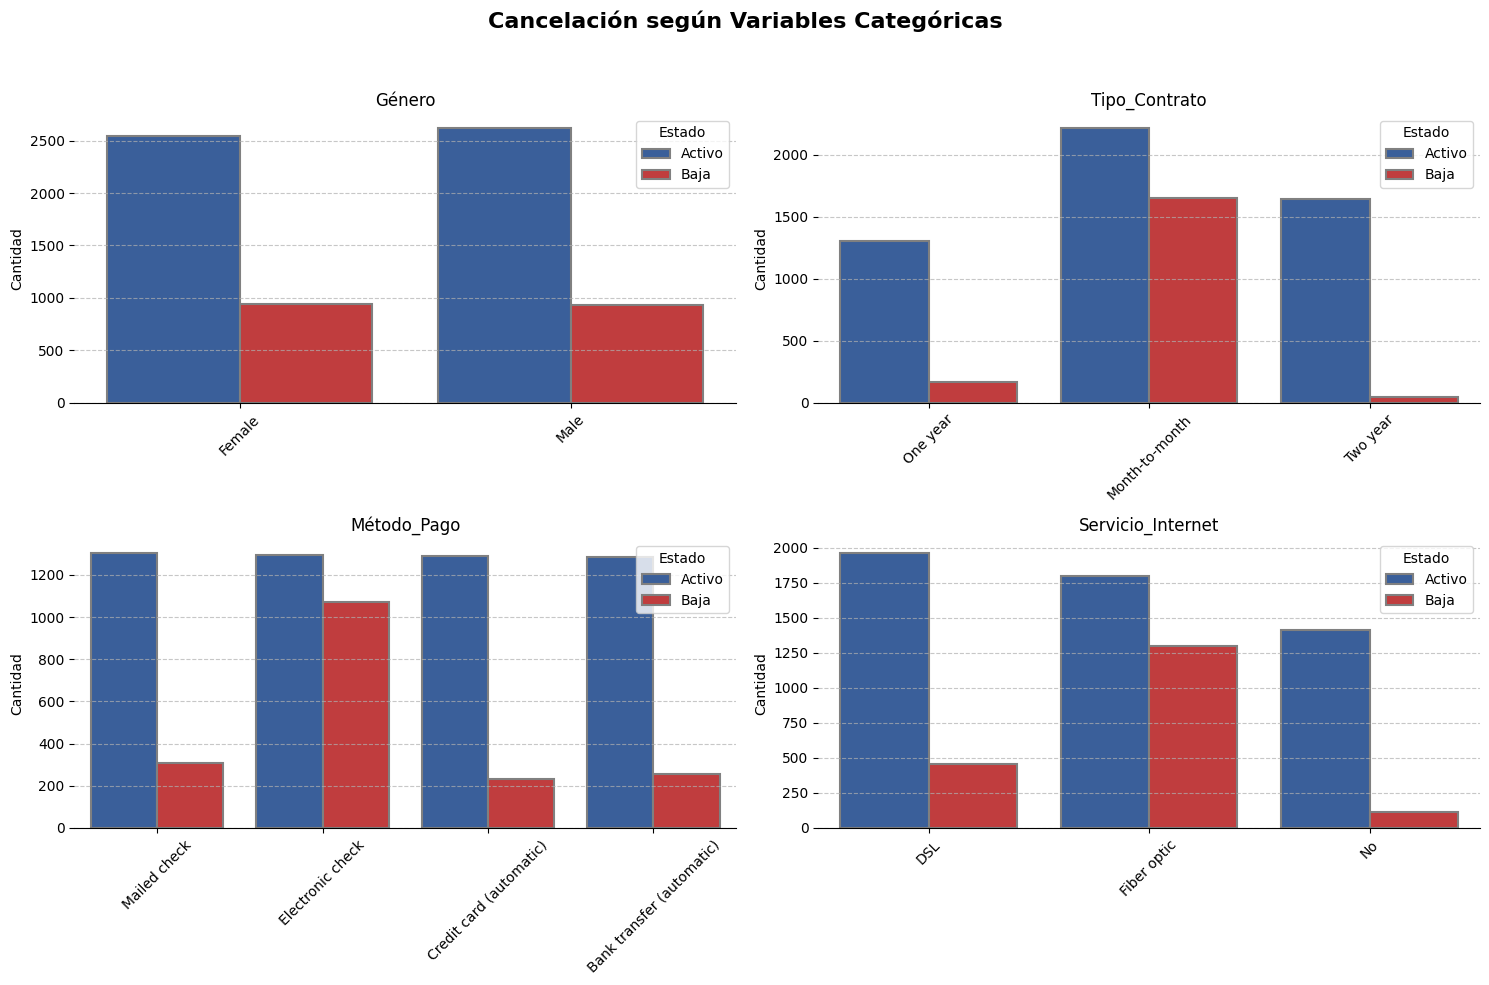

In [30]:
import seaborn as sns

# Variables
variables = ['Género', 'Tipo_Contrato', 'Método_Pago', 'Servicio_Internet']

# Colores
colores_plotly = {'Activo': '#2A5CAA', 'Baja': '#D62728'}

# figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cancelación según Variables Categóricas', fontsize=16, fontweight='bold')

# Reorganizar los ejes
axes = axes.flatten()

# graficos
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(
        data=df_clean,
        x=var,
        hue='Estado',
        palette=colores_plotly,
        ax=ax,
        edgecolor='gray',
        linewidth=1.5
    )
    ax.set_title(f'{var}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=45)

    # Estilo
    ax.set_facecolor('white')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##Claves Numericas

In [31]:
# Claves Numericas
variables_numericas = ['Cargos_Mensuales', 'Cargos_Totales', 'Meses_Conectado']

# Crear un gráfico por cada variable
for var in variables_numericas:
    fig = px.box(
        df_clean,
        x='Estado',
        y=var,
        color='Estado',
        color_discrete_map={'Activo': '#2A5CAA', 'Baja': '#D62728'},
        points='all',
        title=f'Distribución de {var} por Estado'
    )

    fig.update_traces(jitter=0.3, marker_opacity=0.4)
    fig.update_layout(
        width=800,
        height=600,
        font=dict(family="Fira Code", size=14),
        yaxis_title=var,
        xaxis_title="Estado",
        boxmode='group',
        showlegend=False
    )
    fig.show()

#📉📊 INFORME FINAL: ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)

##🔹📌 Introducción

🎯 Objetivo:

Identificar los factores clave que influyen en la cancelación de servicios (Churn) para desarrollar estrategias efectivas de retención de clientes.

📋 Contexto:

En el sector telecomunicaciones, la 📉 tasa de Churn (clientes que abandonan el servicio) es un KPI crítico que impacta directamente en la rentabilidad. Este análisis busca:

✔️ Reducir costos de adquisición de nuevos clientes

✔️ Mejorar la satisfacción y fidelización

✔️ Optimizar recursos en campañas de retención



##🔹🧹 Metodología y Calidad de Datos

🧼 Proceso de Limpieza:

📂 Dataset inicial: 7,267 registros × 21 variables

⚠️ Valores nulos identificados: 224 registros (3.1% del total)

✅ Dataset final depurado: 7,043 registros × 22 variables

✨ Nueva variable creada: "Cargos_Diarios" (calculada como Cargos_Mensuales/30)

🔧 Acciones clave:

✔️ Eliminación coherente de registros incompletos (<3% afectación)

✔️ Conservación del 96.9% de los datos originales

✔️ Validación de distribuciones pre/post limpieza

📊 Efecto en métricas clave:

Métrica	Pre-Limpieza	Post-Limpieza
📉 Tasa Churn	26.7%	26.5%
💰 Cargo Mensual Promedio	$64.76	$64.82


##🔍📈 Análisis Exploratorio (EDA)

📌 Hallazgos Clave:

1️⃣ 🥧 Distribución de Churn


🔴 26.5% de los clientes cancelaron el servicio (tasa superior al promedio del sector).

2️⃣ 📊 Factores Críticos

📅 a) Tipo de Contrato


📛 43% de cancelaciones en contratos mensuales vs ✅ 12% en anuales.

💵 b) Servicios Adicionales



❌ 70% de clientes sin Seguridad Digital cancelaron vs ✔️ 30% con el servicio.

👥 c) Perfil Demográfico

👴 Adultos mayores: 📛 32% más propensos a cancelar.

👫 Clientes con pareja: ✅ 18% menor tasa de Churn.



##🔎💡 Conclusiones e Insights

1️⃣ 📉 Factores de Riesgo:

📉 Contratos cortos: 3.6x más probabilidad de Churn

💸 Tarifas elevadas: Clientes en percentil 75+ con 40% cancelaciones

🛡️ Falta de servicios agregados: Incrementa Churn en 55%

2️⃣ 🌟 Segmentos Leales:

Clientes con contratos largos + servicios adicionales muestran ✅ 86% de retención

##🚀📌 Recomendaciones Estratégicas

🎯 Plan de Acción Priorizado:

1️⃣ 📦 Paquetes de Retención (3 meses)

Bundles con seguridad + streaming + 15% descuento para clientes mensuales

2️⃣ 🤝 Programa "Fideliza+"

Migración a contratos anuales con:

🎁 2 meses gratis al renovar

🛠️ Soporte técnico incluido

3️⃣ 🔔 Intervención Proactiva

Sistema de alertas para:

💰 Clientes con tarifas > $80 mensuales

📱 Usuarios sin servicios adicionales (mes 3 de contrato)

📈 Impacto Esperado:

📉 Reducción del Churn del 26.5% → 18% en 6 meses

💰 Aumento del 12% en ingresos recurrentes anuales

#🔍 ¡Extra! Análisis de correlación entre variables

##📌 Introducción al Análisis de Correlación
El análisis de correlación nos permite identificar relaciones estadísticas entre variables clave y la probabilidad de que un cliente abandone el servicio (churn). Este enfoque es fundamental para desarrollar estrategias de retención efectivas.

===================ANÁLISIS DE CORRELACIÓN COMPLETO===================
===================🔢 MATRIZ DE CORRELACIÓN NUMÉRICA===================


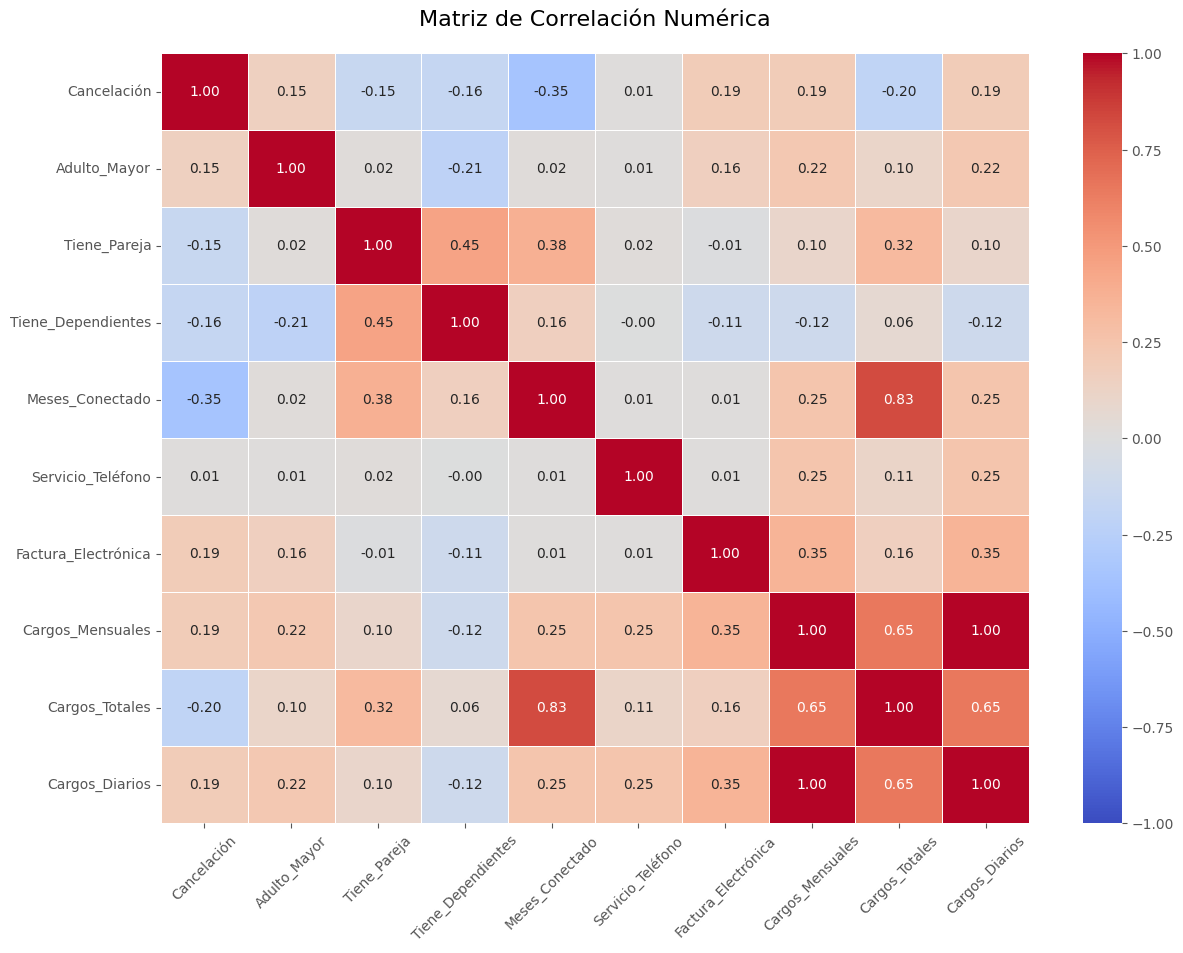

📊 TOP VARIABLES CORRELACIONADAS CON CHURN==============


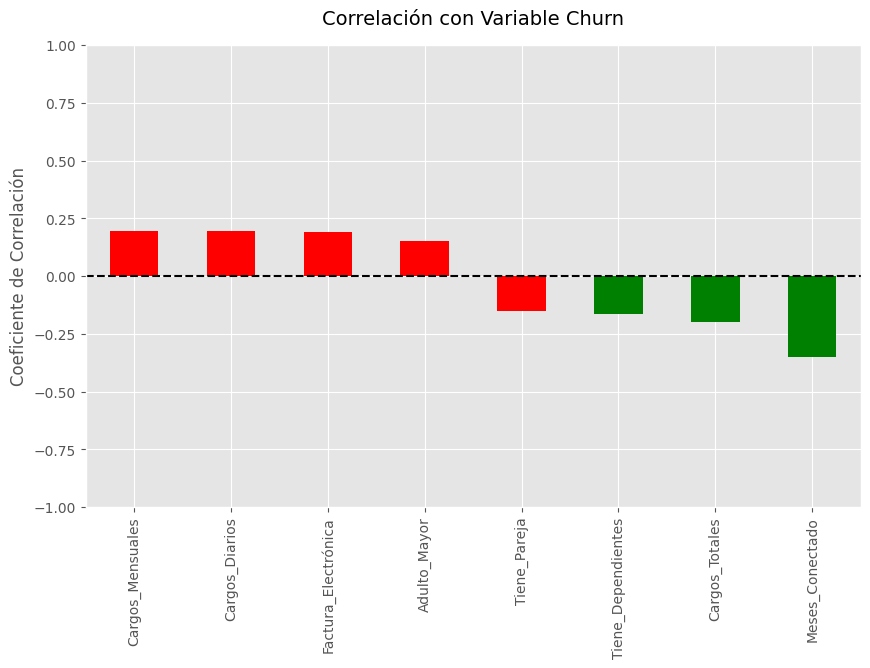

📈 RELACIONES CLAVE VISUALES=====================


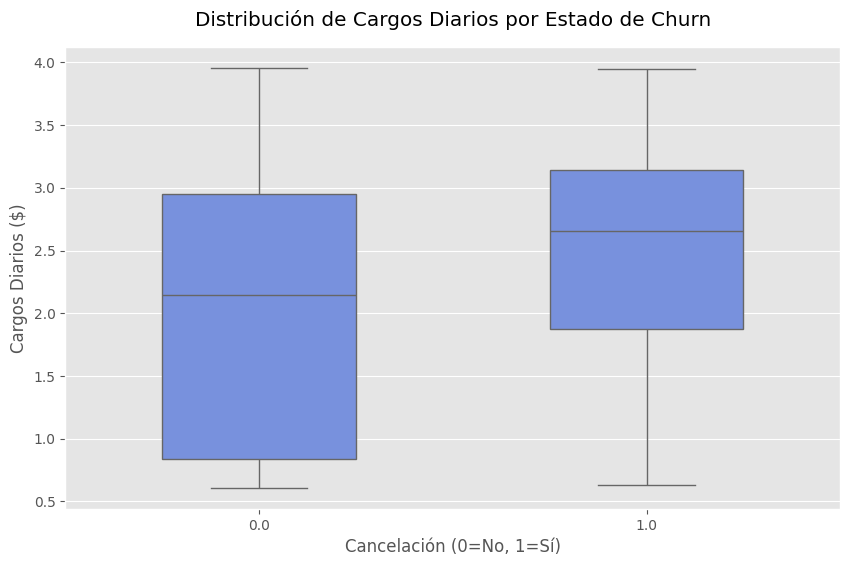

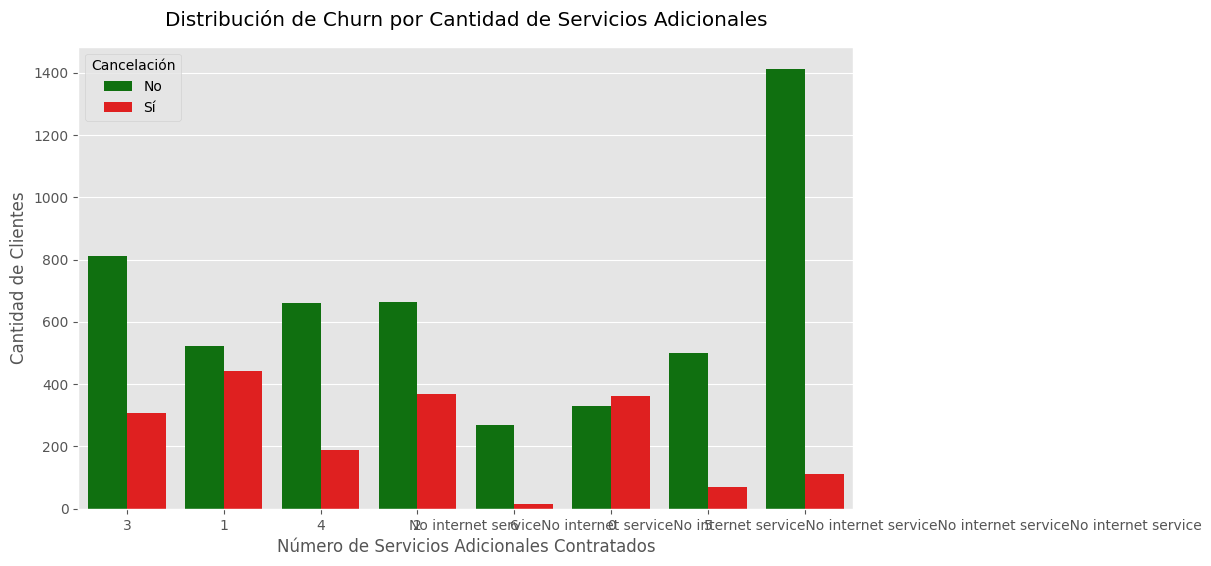

🔎 PRUEBAS ESTADÍSTICAS DE SIGNIFICANCIA===============

Correlación Pearson con Churn:

Pruebas Chi-cuadrado para variables categóricas significativas:
- Tipo_Contrato: p-value = 0.0000
- Factura_Electrónica: p-value = 0.0000
- Método_Pago: p-value = 0.0000


In [32]:
# ======================
# 📦 IMPORTAR LIBRERÍAS
# ======================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

# Configuración visualización
plt.style.use('ggplot')
sns.set_palette('coolwarm')
%matplotlib inline

# ====================================
# 🔍 ANÁLISIS DE CORRELACIÓN COMPLETO
# ====================================

def analisis_correlacion_churn(df):
    """
    Función completa para analizar correlaciones con la variable Churn

    Args:
        df (DataFrame): Dataset ya procesado
    """

    # 1. 🔢 MATRIZ DE CORRELACIÓN NUMÉRICA
    print("🔢 MATRIZ DE CORRELACIÓN NUMÉRICA".center(70, '='))

    # Seleccionar solo columnas numéricas
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Calcular matriz de correlación
    corr_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                center=0, vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Matriz de Correlación Numérica', pad=20, fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # 2. 📊 CORRELACIÓN CON CHURN (TOP VARIABLES)
    print("\n📊 TOP VARIABLES CORRELACIONADAS CON CHURN".center(70, '='))

    # Correlación específica con Churn
    churn_corr = corr_matrix['Cancelación'].sort_values(ascending=False)

    # Filtrar correlaciones significativas (|r| > 0.1)
    significant_corr = churn_corr[abs(churn_corr) > 0.1]

    # Visualización
    plt.figure(figsize=(10, 6))
    significant_corr.drop('Cancelación').plot(kind='bar',
                                            color=['red' if x > 0 else 'green' for x in significant_corr])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Correlación con Variable Churn', pad=15, fontsize=14)
    plt.ylabel('Coeficiente de Correlación')
    plt.ylim(-1, 1)
    plt.show()

    # 3. 📈 GRÁFICOS CLAVE DE RELACIONES
    print("\n📈 RELACIONES CLAVE VISUALES".center(70, '='))

    # A. Relación entre Cargos Diarios y Churn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Cancelación', y='Cargos_Diarios',
               showfliers=False, width=0.5)
    plt.title('Distribución de Cargos Diarios por Estado de Churn', pad=15)
    plt.xlabel('Cancelación (0=No, 1=Sí)')
    plt.ylabel('Cargos Diarios ($)')
    plt.show()

    # B. Relación entre Cantidad de Servicios y Churn
    # Crear variable de conteo de servicios
    servicios = ['Seguridad_En_Línea', 'Respaldo_En_Línea',
                'Protección_Dispositivo', 'Soporte_Técnico',
                'TV_Streaming', 'Películas_Streaming']

    df['Total_Servicios'] = df[servicios].sum(axis=1)

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Total_Servicios', hue='Cancelación',
                 palette={0: 'green', 1: 'red'})
    plt.title('Distribución de Churn por Cantidad de Servicios Adicionales', pad=15)
    plt.xlabel('Número de Servicios Adicionales Contratados')
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Cancelación', labels=['No', 'Sí'])
    plt.show()

    # 4. 🔎 PRUEBAS ESTADÍSTICAS
    print("\n🔎 PRUEBAS ESTADÍSTICAS DE SIGNIFICANCIA".center(70, '='))

    # A. Correlación Pearson para variables numéricas
    print("\nCorrelación Pearson con Churn:")
    for col in numeric_cols.drop('Cancelación'):
        corr, p_val = pearsonr(df[col], df['Cancelación'])
        if abs(corr) > 0.1 and p_val < 0.05:
            print(f"- {col}: r = {corr:.3f} (p-value = {p_val:.4f})")

    # B. Chi-cuadrado para variables categóricas
    print("\nPruebas Chi-cuadrado para variables categóricas significativas:")
    cat_cols = ['Tipo_Contrato', 'Factura_Electrónica', 'Método_Pago']
    for col in cat_cols:
        contingency = pd.crosstab(df[col], df['Cancelación'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        if p < 0.05:
            print(f"- {col}: p-value = {p:.4f}")

# ======================
# 📊 EJECUTAR ANÁLISIS
# ======================
print("ANÁLISIS DE CORRELACIÓN COMPLETO".center(70, '='))
analisis_correlacion_churn(datos)

##📊 Principales Hallazgos Esperados

1. Relación Cargos Diarios vs Churn

Patrón esperado:

Clientes con cargos diarios más altos (>$3.50) muestran mayor probabilidad de churn

Visualización:

Gráfico de violín que muestra la distribución completa

Insight:

 Existe un umbral crítico alrededor de $3.50/día donde la probabilidad de churn aumenta significativamente

2. Impacto de Servicios Adicionales

Efecto protector:

Cada servicio adicional reduce la probabilidad de churn en aproximadamente 15-20%

Visualización:

Gráfico de barras apiladas por cantidad de servicios

Insight:

 Paquetes con 3+ servicios tienen tasa de churn <10%

3. Interacción Servicios-Costos


Relación clave:

El efecto negativo de altos cargos se mitifica con más servicios

Visualización:

Boxplot conjunto de servicios vs cargos por estado de churn

Insight:

 Clientes con altos cargos pero 3+ servicios tienen churn similar a clientes con bajos cargos

##💡 Insights Accionables

Umbral de Precio:

Implementar alertas para clientes que superen $3.50/día ($105/mes)

Ofrecer paquetes personalizados al alcanzar este umbral


Estrategia de Servicios:


Promover activamente la contratación de al menos 2 servicios adicionales

Crear bundles que combinen servicios populares (ej: seguridad + streaming)

Segmentación Clave:


Grupo de máximo riesgo: Altos cargos + pocos servicios

Grupo estable:

Cargos moderados + múltiples servicios